In [1]:
# !conda install gcm_filters

In [2]:
import warnings
warnings.filterwarnings("ignore")

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/title.png" width=70% style="padding:0px; margin:0px; margin-bottom:-20px ; margin-top:-20px"/>
    <h2>
        <span style="font:tradegothic; color:gray">GCM-Filters: A Python Package for Spatial Filtering of Gridded Data from Ocean and Climate Models</span>
    </h2>
    <hr>
</div>
<div align="center" style="margin:0px; padding:0px; margin-top:-20px">
    <span style="font-size:18px"> <a href="https://noraloose.github.io/">Nora Loose</a></span><span style="font:tradegothic; style=color:black; font-size:18px"><sup>1</sup>, Ryan Abernathey<sup>2</sup>, Ian Grooms<sup>1</sup>, Julius Busecke<sup>2</sup>, Arthur Guillaumin<sup>3</sup>, Elizabeth Yankovsky<sup>3</sup>, Gustavo Marques<sup>4</sup>, Jacob Steinberg<sup>5</sup>, Andrew Slavin Ross<sup>3</sup>, Hemant Khatri<sup>6</sup>, Scott Bachman<sup>4</sup>, Laure Zanna<sup>3</sup>, and Paige Martin<sup>2,7</sup></span>
</div>
<div align="center" style="line-height:80%" >
    <span style="font:tradegothic; color:gray; font-size:12px"><sup>1</sup>Department of Applied Mathematics, University of Colorado Boulder, Boulder, CO, USA</span><br>
    <span style="font:tradegothic; color:gray; font-size:12px"><sup>2</sup>Lamont-Doherty Earth Observatory, Columbia University, New York, NY, USA</span><br>
    <span style="font:tradegothic; color:gray; font-size:12px"><sup>3</sup>Courant Institute of Mathematical Sciences, New York University, New York, NY, USA</span><br>
    <span style="font:tradegothic; color:gray; font-size:12px"><sup>4</sup>Climate and Global Dynamics Division, National Center for Atmospheric Research, Boulder, CO, USA</span><br>
     <span style="font:tradegothic; color:gray; font-size:12px"><sup>5</sup>Woods Hole Oceanographic Institution, Woods Hole, MA, USA</span><br>
     <span style="font:tradegothic; color:gray; font-size:12px"><sup>6</sup>Earth, Ocean and Ecological Sciences, University of Liverpool, UK</span><br>
     <span style="font:tradegothic; color:gray; font-size:12px"><sup>7</sup>Australian National University, Canberra, Australia</span><br>
</div>
<div align="center">
    <img src="./images/funding.png" width=40%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Abstract</span></h2>
     <hr>
</div>

<div align="left" style="line-height:80%" >
<span style="font-size:14px">
Applying a spatial filter to gridded data from models or observations is a common analysis method in the Earth Sciences, for example to study oceanic and atmospheric motions at different spatial scales or to develop subgrid-scale parameterizations for ocean models. The spatial filters that are included in existing python packages, such as SciPy's multidimensional Gaussian filter, are typically specialized for image processing. For data from General Circulation Models (GCMs), image processing tools are however of limited use because these tools assume a regular and rectangular Cartesian grid and employ simple boundary conditions. In contrast, GCMs come on irregular curvilinear grids, and continental boundaries in GCMs need more careful treatment than currently supported. 
<br>
<br> 
Here we introduce a new python package, GCM-Filters, which is specifically designed to filter GCM data. The GCM-Filters algorithm applies a discrete Laplacian to smooth a field through an iterative process that resembles diffusion. The discrete Laplacian takes into account the varying grid-cell geometry of the complex GCM grids and uses a no-flux boundary condition, mimicking how diffusion is internally implemented in GCMs and ensuring conservation of the integral. Conservation of the integral is a desirable filter property for many physical quantities, for example energy or ocean salinity. The user can employ GCM-Filters on either CPUs or GPUs, with NumPy or CuPy input data. Moreover, GCM-Filters leverages Dask and Xarray to support filtering of larger-than-memory datasets and computational flexibility.
<br> 
<br>
In this talk, we will present examples of how to use GCM-Filters in a range of oceanographic applications. Ongoing development of the GCM-Filters package is hosted on GitHub at <a href="https://github.com/ocean-eddy-cpt/gcm-filters">https://github.com/ocean-eddy-cpt/gcm-filters</a>, with community contributions welcome.
</span>    
</div>

<hr>

<a href="https://annual.ametsoc.org/index.cfm/2022/program-events/conferences-and-symposia/12th-symposium-on-advances-in-modeling-and-analysis-using-python/">12th Symposium on Advances in Modeling and Analysis Using Python</a>, AMS Meeting 2022
<br>
<b>Session:</b> Python Tools in the Atmospheric and Oceanic Sciences. Part I
<br>
<b>Date:</b> January 25, 2022

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Spatial filters in the geosciences: What for?</span></h2>
     <hr>
</div>

<div>
    <img src="./images/filter_intro.png" width=100%/>
</div>

<div align="left" style="font-size:18px;">
    Useful for:
    <ul>
      <li>Studying oceanic and atmospheric motions at different spatial scales</li> 
      <li>Identifying small scale part of data (= the residual), which is often unresolved in models and needs to be parameterized</li> 
    </ul> 
</div>

In [3]:
import scipy
import matplotlib.pyplot as plt
octocat = plt.imread('images/github_octocat.jpeg')

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Why not use existing tools in the python stack?</span></h2>
     <hr>
</div>

In [4]:
from scipy.ndimage import uniform_filter, gaussian_filter
blurred_cat = uniform_filter(octocat)

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->

<div>
    <img src="./images/octocat_cartesian.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <span style="font-size:20px;">Existing python tools are specialized for image processing and Cartesian grids</span>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h3><span style="font:futura; color:black">General circulation model (GCM) output comes on complex grids</span></h3>
     <hr>
</div>
<div align="left" style="font-size:18px;">
    <ul>
      <li>Grid cell geometry is spatially varying</li> 
      <li>Continental boundaries</li>
      <li>Complex grid topologies require non-trivial exchanges at grid "edges" (e.g., <span style="font:tradegothic; color:green">periodic</span>, <span style="font:tradegothic; color:orange">tripolar</span>)</li> 
    </ul> 
</div>

<div align="center">
    <img src="./images/gcm_grid_all.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Continental boundaries need proper handling</span></h2>
     <hr>
</div>

<div align="center">
    <img src="./images/SST_filtered.png" width=100%/>
</div>

<div align="center">
    <span style="font-size:20px;">Conventional filter propagates fill value from land into ocean interior</span>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Complex grid topology requires non-trivial exchanges</span></h2>
     <hr>
</div>

<div align="center">
    <img src="./images/tripole_fold.png" width=100%/>
</div>

<div align="center">
    <span style="font-size:20px;">Conventional filter ignores exchanges across tripole fold</span>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Introducing GCM-Filters</span></h2>
     <hr>
</div>

<table>
  <tr>
    <td>
        <div align="left" style="font-size:18px">
            <b><span style="font-size:18px">Algorithm:</span></b>
               \begin{align*}
               \bar{d}_0 & =  d \\
               \bar{d}_k & = \bar{d}_{k-1} + \frac{1}{s_k} \Delta \bar{d}_{k-1}
               \end{align*}
            <ul style="padding-left:1.2em; margin-left: 0;">
              <li>based on discrete Laplacian (<a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002552">Grooms et al., 2021</a>)</li> 
                <li>mimics how <b>diffusion</b> is internally implemented in GCMs</li> 
            </ul> 
        </div>
    </td>
    <td>
        <div align="right">
          <img src="./images/diffusion.png" width="100%" style="padding:0px; margin:0px; margin-left:-20px; margin-bottom:-20px ; margin-top:-20px"/>
        </div>
      </td>
  </tr>
</table>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left" style="font-size:18px;">
    <b>Addtional goals of GCM-Filters:</b>
    <ul style="padding-left:1.2em; margin-left: 0;">
      <li>Support filtering of larger-than-memory datasets via parallelized & delayed execution</li> 
      <li>Enable filter analysis on both CPUs and GPUs</li>
    </ul> 
</div>
   <img src="./images/python_logos.png" width=100%/>

<div align="center">
    <h2><span style="font:futura; color:black">GCM-Filters in action</span></h2>
     <hr>
</div>

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [6]:
import xarray as xr
import gcm_filters

In [7]:
# download 1 snapshot of full-depth velocity data from POP 0.1 degree simulation (4.6 GB)
#import pooch
#
#fname = pooch.retrieve(
#    url="doi:10.6084/m9.figshare.18738593.v1/POP_velocities_0.1degree.nc",
#    known_hash="md5:66b5dbbc0da68366aaa4355c17294211"
#)
#ds = xr.open_dataset(fname, chunks={'z_t': 1})

#######
# alternatively, if you are on casper:
ds = xr.open_dataset('/glade/scratch/noraloose/tripolar_POP_data.nc', chunks={'z_t': 1})

In [8]:
ds = ds.astype(np.float64)

#### Available grid types

In [9]:
list(gcm_filters.GridType)

[<GridType.REGULAR: 1>,
 <GridType.REGULAR_AREA_WEIGHTED: 2>,
 <GridType.REGULAR_WITH_LAND: 3>,
 <GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>,
 <GridType.IRREGULAR_WITH_LAND: 5>,
 <GridType.MOM5U: 6>,
 <GridType.MOM5T: 7>,
 <GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED: 8>,
 <GridType.TRIPOLAR_POP_WITH_LAND: 9>,
 <GridType.VECTOR_C_GRID: 10>]

#### Required grid variables

In [10]:
gcm_filters.required_grid_vars(gcm_filters.GridType.TRIPOLAR_POP_WITH_LAND)

['wet_mask', 'dxe', 'dye', 'dxn', 'dyn', 'tarea']

In [11]:
wet_mask = xr.where(ds['KMU']>0, 1, 0)

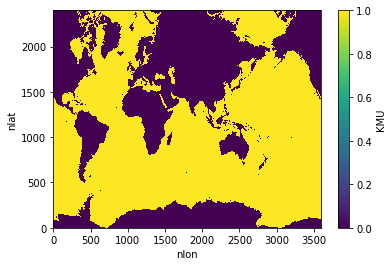

In [12]:
wet_mask.plot()

In [13]:
dxe = ds.HUS / 100  # x-spacing centered at eastern T-cell edge in m
dye = ds.HTE / 100  # y-spacing centered at eastern T-cell edge in m
dxn = ds.HTN / 100  # x-spacing centered at northern T-cell edge in m
dyn = ds.HUW / 100  # y-spacing centered at northern T-cell edge in m
area = ds.TAREA / 100**2  # T-cell area in m^2

In [14]:
u = ds.UVEL.where(wet_mask) / 100  # zonal velocity in m
v = ds.VVEL.where(wet_mask) / 100  # meridional velocity in m

In [15]:
KE = 0.5 * (u**2 + v**2)  # kinetic energy 

<div align="center">
    <h2><span style="font:futura; color:black">Creating the filter object</span></h2>
     <hr>
</div>

In [16]:
specs = {
    'filter_scale': 100000,
    'filter_shape': gcm_filters.FilterShape.GAUSSIAN,
}

In [17]:
filter = gcm_filters.Filter(
    **specs,
    grid_type=gcm_filters.GridType.TRIPOLAR_POP_WITH_LAND,
    grid_vars={
        'wet_mask': wet_mask, 
        'dxe': dxe, 'dye': dye, 'dxn': dxn, 'dyn': dyn, 
        'tarea': area
    },
    dx_min=dxe.where(wet_mask).min().values,
)
filter

Filter(filter_scale=100000, dx_min=array(2245.78304344), filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=49, grid_type=<GridType.TRIPOLAR_POP_WITH_LAND: 9>)

<div align="center">
    <h2><span style="font:futura; color:black">Filtering on CPU</span></h2>
     <hr>
</div>

In [18]:
KE.data  # 1 snapshot of kinetic energy 

,Array,Chunk
Bytes,4.29 GB,69.12 MB
Shape,"(1, 62, 2400, 3600)","(1, 1, 2400, 3600)"
Count,750 Tasks,62 Chunks
Type,float64,numpy.ndarray


In [19]:
KE_filtered = filter.apply(KE, dims=['nlat', 'nlon'])  # apply filter lazily: computation is deferred
KE_filtered.data

,Array,Chunk
Bytes,4.29 GB,69.12 MB
Shape,"(1, 62, 2400, 3600)","(1, 1, 2400, 3600)"
Count,951 Tasks,62 Chunks
Type,float64,numpy.ndarray


<div align="center">
    <h2><span style="font:futura; color:black">Filtering on GPU</span></h2>
     <hr>
</div>

In [20]:
import cupy as cp

### Create filter object that works on GPUs

In [21]:
wet_mask_gpu = wet_mask.copy()
wet_mask_gpu.data = wet_mask_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks
wet_mask_gpu

<xarray.DataArray 'KMU' (nlat: 2400, nlon: 3600)>
dask.array<asarray, shape=(2400, 3600), dtype=int64, chunksize=(2400, 3600), chunktype=cupy.ndarray>
Coordinates:
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [22]:
dxe_gpu = dxe.copy()
dxe_gpu.data = dxe_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [23]:
dye_gpu = dye.copy()
dye_gpu.data = dye_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [24]:
dxn_gpu = dxn.copy()
dxn_gpu.data = dxn_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [25]:
dyn_gpu = dyn.copy()
dyn_gpu.data = dyn_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [26]:
area_gpu = area.copy()
area_gpu.data = area_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [27]:
filter_gpu = gcm_filters.Filter(
    **specs,
    grid_type=gcm_filters.GridType.TRIPOLAR_POP_WITH_LAND,
    grid_vars={
        'wet_mask': wet_mask_gpu, 
        'dxe': dxe_gpu, 'dye': dye_gpu, 'dxn': dxn_gpu, 'dyn': dyn_gpu, 
        'tarea': area_gpu,
    },
    dx_min=dxe.where(wet_mask).min().values,
)
filter_gpu

Filter(filter_scale=100000, dx_min=array(2245.78304344), filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=49, grid_type=<GridType.TRIPOLAR_POP_WITH_LAND: 9>)

In [28]:
KE_gpu = KE.copy()
KE_gpu.data = KE_gpu.data.map_blocks(cp.asarray)  # map numpy chuncks to cupy chunks

In [29]:
KE_gpu.data

,Array,Chunk
Bytes,4.29 GB,69.12 MB
Shape,"(1, 62, 2400, 3600)","(1, 1, 2400, 3600)"
Count,812 Tasks,62 Chunks
Type,float64,cupy.ndarray


In [30]:
KE_gpu_filtered = filter_gpu.apply(KE_gpu, dims=['nlat', 'nlon'])  # apply filter lazily
KE_gpu_filtered.data

,Array,Chunk
Bytes,4.29 GB,69.12 MB
Shape,"(1, 62, 2400, 3600)","(1, 1, 2400, 3600)"
Count,1025 Tasks,62 Chunks
Type,float64,cupy.ndarray


<div align="center">
    <h2><span style="font:futura; color:black">Triggering filter computation for surface level</span></h2>
     <hr>
</div>

In [31]:
%time computed_cpu = KE_filtered.isel(z_t=0).compute()  # trigger filter computation on CPU

CPU times: user 17.4 s, sys: 11.1 s, total: 28.6 s
Wall time: 29.3 s


In [32]:
%time computed_gpu = KE_gpu_filtered.isel(z_t=0).compute()  # trigger filter computation on GPU

CPU times: user 1.81 s, sys: 887 ms, total: 2.7 s
Wall time: 2.98 s


In [33]:
import matplotlib.ticker as mticker

vmin = 0
cmap='YlOrRd'
xslice = slice(500, 800)
yslice = slice(1500, 1800)

# function that produces nice plots of KE in Gulf Stream region
def plot_subregion(ax, da, vmax, title):
    
    p = da.isel(nlon=xslice,nlat=yslice).plot(
        ax=ax, x='ULONG',y='ULAT', vmin=vmin, vmax=vmax, cmap=cmap, 
        transform=ccrs.PlateCarree(), add_labels=False, cbar_kwargs={'label': 'm$^2$ s$^{-2}$'}
    )
    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    ax.set(title=title)
    ax.coastlines()
    ax.set_extent([-60, -32.5, 32.5, 52.5], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([35, 40, 45, 50])

    return fig

In [34]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 16}
pylab.rcParams.update(params)

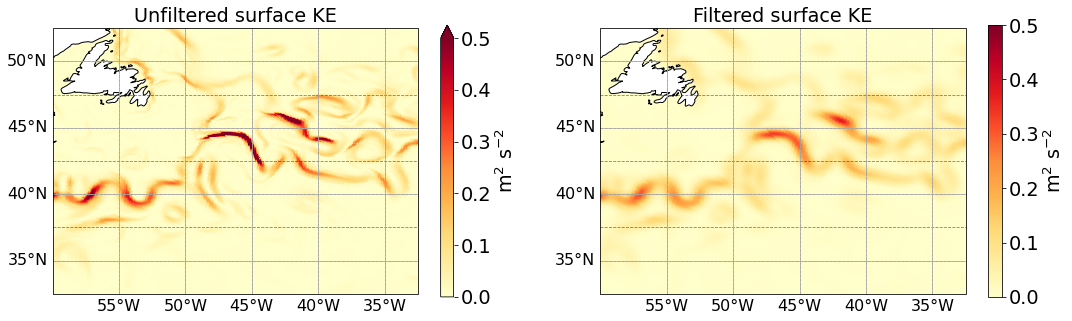

In [35]:
fig, axs = plt.subplots(1,2,figsize=(18,5),subplot_kw={'projection':ccrs.PlateCarree()})

plot_subregion(axs[0], KE.isel(z_t=0), vmax=0.5, title=r'Unfiltered surface KE');
plot_subregion(axs[1], computed_cpu, vmax=0.5, title=r'Filtered surface KE');

plt.savefig('images/KE_filtered.png', dpi=200, bbox_inches='tight', pad_inches=0)

<img src="./images/KE_filtered.png" width=100%/>

<div align="center">
    <h2><span style="font:futura; color:black">Filter conserves global integral</span></h2>
     <hr>
</div>
<div align="center">
    $\int_\text{global ocean} \text{KE}(x,y) \,dA = \int_\text{global ocean} \overline{\text{KE}}(x,y)\, dA$
</div>    

In [36]:
(KE.isel(z_t=0) * area).sum(dim=['nlon', 'nlat']).values

array([8.26510812e+12])

In [37]:
(KE_filtered.isel(z_t=0) * area).sum(dim=['nlon', 'nlat']).values

array([8.26510812e+12])

 <div align="center">
    <h2><span style="font:futura; color:black">Computing eddy kinetic energy</span></h2>
     <hr>
</div>
Define mean kinetic energy (MKE) and eddy kinetic energy (EKE):
\begin{align*}
\text{MKE} = \frac{1}{2} ( \bar{u}^2 + \bar{v}^2),
\qquad\qquad
\text{EKE} = \underbrace{\frac{1}{2} \overline{ (u^2 + v^2)}}_\text{filtered KE} - \underbrace{\frac{1}{2} ( \bar{u}^2 + \bar{v}^2)}_\text{MKE}.
\end{align*}


In [38]:
u_filtered = filter.apply(u, dims=['nlat', 'nlon'])
v_filtered = filter.apply(v, dims=['nlat', 'nlon'])

In [39]:
MKE = 0.5 * (u_filtered**2 + v_filtered**2)
EKE = KE_filtered - MKE

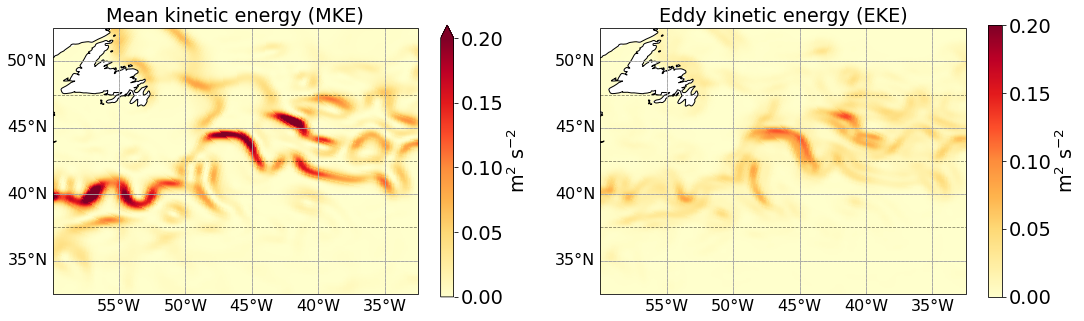

In [40]:
fig, axs = plt.subplots(1,2,figsize=(18,5),subplot_kw={'projection':ccrs.PlateCarree()})

plot_subregion(axs[0], MKE.isel(z_t=0), vmax=0.2, title='Mean kinetic energy (MKE)');
plot_subregion(axs[1], EKE.isel(z_t=0), vmax=0.2, title='Eddy kinetic energy (EKE)');

plt.savefig('images/MKE_EKE.png', dpi=200, bbox_inches='tight', pad_inches=0)

<img src="./images/MKE_EKE.png" width=100%/>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Summary GCM-Filters</span></h2>
     <hr>
</div>

* Specifically designed for <b>gridded data produced by GCMs</b> of ocean and climate
* Geometry of complex GCM grids is respected by GCM-Filters Laplacians
* GCM-Filters enables <b>parallel, out-of-core filter analysis</b> on both <b>CPUs and GPUs</b>

### Get Involved!

* Try it out:
```bash
conda install -c conda-forge gcm_filters
```
* Documentation: [gcm-filters.readthedocs.io/](https://gcm-filters.readthedocs.io/en/latest/)
* File issues and make pull requests on GitHub: [https://github.com/ocean-eddy-cpt/gcm-filters](https://github.com/ocean-eddy-cpt/gcm-filters)

[![Tests](https://github.com/ocean-eddy-cpt/gcm-filters/workflows/Tests/badge.svg)](https://github.com/ocean-eddy-cpt/gcm-filters/actions?query=workflow%3ATests)
[![codecov](https://codecov.io/gh/ocean-eddy-cpt/gcm-filters/branch/master/graph/badge.svg?token=ZKRiulYe68)](https://codecov.io/gh/ocean-eddy-cpt/gcm-filters)
[![Documentation Status](https://readthedocs.org/projects/gcm-filters/badge/?version=latest)](https://gcm-filters.readthedocs.io/en/latest/?badge=latest)
[![Conda Version](https://img.shields.io/conda/vn/conda-forge/gcm_filters.svg)](https://anaconda.org/conda-forge/gcm_filters)
[![PyPI version](https://badge.fury.io/py/gcm-filters.svg)](https://badge.fury.io/py/gcm-filters)
[![Downloads](https://pepy.tech/badge/gcm-filters)](https://pepy.tech/project/gcm-filters)
[![status](https://joss.theoj.org/papers/bc8ad806627f0d754347686e21f00d40/status.svg)](https://joss.theoj.org/papers/bc8ad806627f0d754347686e21f00d40)